In [11]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [1]:
!wget http://benchmark.ini.rub.de/Dataset/GTSRB_Final_Training_Images.zip


--2018-09-30 11:26:40--  http://benchmark.ini.rub.de/Dataset/GTSRB_Final_Training_Images.zip
Resolving benchmark.ini.rub.de (benchmark.ini.rub.de)... 134.147.122.15
Connecting to benchmark.ini.rub.de (benchmark.ini.rub.de)|134.147.122.15|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276294756 (263M) [application/zip]
Saving to: ‘GTSRB_Final_Training_Images.zip’

GTSRB_Final_Trainin 100%[===================>] 263.50M   407KB/s    in 11m 51s 

2018-09-30 11:38:31 (380 KB/s) - ‘GTSRB_Final_Training_Images.zip’ saved [276294756/276294756]



In [2]:
!ls

GTSRB_Final_Training_Images.zip  Traffic_signal_with_CNN.ipynb


In [3]:
from zipfile import ZipFile

f = ZipFile('GTSRB_Final_Training_Images.zip')
f.extractall()


In [13]:
!ls

GTSRB  GTSRB_Final_Training_Images.zip	Traffic_signal_with_CNN.ipynb


In [4]:
!ls GTSRB/Final_Training/Images/00000/

00000_00000.ppm  00001_00023.ppm  00003_00016.ppm  00005_00009.ppm
00000_00001.ppm  00001_00024.ppm  00003_00017.ppm  00005_00010.ppm
00000_00002.ppm  00001_00025.ppm  00003_00018.ppm  00005_00011.ppm
00000_00003.ppm  00001_00026.ppm  00003_00019.ppm  00005_00012.ppm
00000_00004.ppm  00001_00027.ppm  00003_00020.ppm  00005_00013.ppm
00000_00005.ppm  00001_00028.ppm  00003_00021.ppm  00005_00014.ppm
00000_00006.ppm  00001_00029.ppm  00003_00022.ppm  00005_00015.ppm
00000_00007.ppm  00002_00000.ppm  00003_00023.ppm  00005_00016.ppm
00000_00008.ppm  00002_00001.ppm  00003_00024.ppm  00005_00017.ppm
00000_00009.ppm  00002_00002.ppm  00003_00025.ppm  00005_00018.ppm
00000_00010.ppm  00002_00003.ppm  00003_00026.ppm  00005_00019.ppm
00000_00011.ppm  00002_00004.ppm  00003_00027.ppm  00005_00020.ppm
00000_00012.ppm  00002_00005.ppm  00003_00028.ppm  00005_00021.ppm
00000_00013.ppm  00002_00006.ppm  00003_00029.ppm  00005_00022.ppm
00000_00014.ppm  00002_00007.ppm  00004_00000.ppm  00005_00023

In [5]:
!ls GTSRB/Final_Training/Images/

00000  00004  00008  00012  00016  00020  00024  00028	00032  00036  00040
00001  00005  00009  00013  00017  00021  00025  00029	00033  00037  00041
00002  00006  00010  00014  00018  00022  00026  00030	00034  00038  00042
00003  00007  00011  00015  00019  00023  00027  00031	00035  00039


In [19]:
base =  '/home/ali/Codes/otherCOdes/GermanTrafficSigns/GTSRB/Final_Training/Images/'
IMG_SIZE = 32
NUM_CLASSES = 43

labels = {0 : 'Speed limit (20km/h)',
          1	: 'Speed limit (30km/h)',
          2	: 'Speed limit (50km/h)',
          3	: 'Speed limit (60km/h)',
          4	: 'Speed limit (70km/h)',
          5	: 'Speed limit (80km/h)',
          6	: 'End of speed limit (80km/h)',
          7	: 'Speed limit (100km/h)',
          8	: 'Speed limit (120km/h)',
          9	: 'No passing',
          10:	'No passing for vechiles over 3.5 metric tons',
          11:	'Right-of-way at the next intersection',
          12:	'Priority road',
          13:	'Yield',
          14:	'Stop',
          15:	'No vechiles',
          16:	'Vechiles over 3.5 metric tons prohibited',
          17:	'No entry',
          18:	'General caution',
          19:	'Dangerous curve to the left',
          20:	'Dangerous curve to the right',
          21:	'Double curve',
          22:	'Bumpy road',
          23:	'Slippery road',
          24:	'Road narrows on the right',
          25:	'Road work',
          26:	'Traffic signals',
          27:	'Pedestrians',
          28:	'Children crossing',
          29:	'Bicycles crossing',
          30:	'Beware of ice/snow',
          31:	'Wild animals crossing',
          32:	'End of all speed and passing limits',
          33:	'Turn right ahead',
          34:	'Turn left ahead',
          35:	'Ahead only',
          36:	'Go straight or right',
          37:	'Go straight or left',
          38:	'Keep right',
          39:	'Keep left',
          40:	'Roundabout mandatory',
          41:	'End of no passing',
          42:	'End of no passing by vechiles over 3.5 metric tons'}


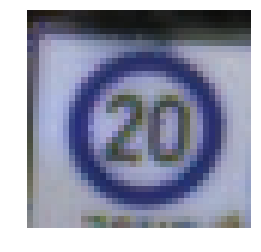

In [21]:
img = cv2.imread(base + '00000/00003_00012.ppm')
plt.imshow(img)
plt.axis('off')
plt.show()

In [22]:
import os
%matplotlib inline

for directory in os.listdir(base):
    data = pd.read_csv(base + directory + '/GT-' + directory + '.csv', delimiter = ';')
    images = data['Filename']
    x = data['Roi.X1']
    y = data['Roi.Y1']
    w = data['Roi.X2']
    h = data['Roi.Y2']
    for n, image_path in enumerate(images):
        path = base + directory + '/'+ image_path
        img = cv2.imread(path)
        img = img[x[n]:x[n]+w[n], y[n]:y[n]+h[n]]
        cv2.imwrite(path, img)
 

In [23]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range = 20,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  rescale = 1./255,
                                  zoom_range = 0.1,
                                  horizontal_flip = True)

generator = datagen.flow_from_directory(base,
                                        target_size = (IMG_SIZE,IMG_SIZE),
                                        batch_size = 32)

Using TensorFlow backend.


Found 39209 images belonging to 43 classes.


In [25]:
from keras.layers import Conv2D, Activation, BatchNormalization, MaxPooling2D, Dense, Dropout, Flatten, Input
from keras.models import Sequential

In [26]:


model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                     input_shape=(IMG_SIZE, IMG_SIZE, 3),
                     activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same',
                     activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(BatchNormalization()) 

model.add(Conv2D(128, (3, 3), padding='same',
                     activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'Adadelta', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [27]:
model.fit_generator(generator, 
                    steps_per_epoch = 612, 
                    epochs = 10, 
                    use_multiprocessing = True)

Epoch 1/10
612/612 [==============================] - 88s 143ms/step - loss: 3.0472 - acc: 0.1605
Epoch 2/10
612/612 [==============================] - 86s 141ms/step - loss: 1.8421 - acc: 0.4090
Epoch 3/10
612/612 [==============================] - 86s 141ms/step - loss: 1.2492 - acc: 0.5913
Epoch 4/10
612/612 [==============================] - 87s 142ms/step - loss: 0.9223 - acc: 0.6989
Epoch 5/10
612/612 [==============================] - 87s 142ms/step - loss: 0.7135 - acc: 0.7674
Epoch 6/10
612/612 [==============================] - 87s 143ms/step - loss: 0.5999 - acc: 0.8067
Epoch 7/10
612/612 [==============================] - 87s 143ms/step - loss: 0.4930 - acc: 0.8408
Epoch 8/10
612/612 [==============================] - 87s 142ms/step - loss: 0.4478 - acc: 0.8545
Epoch 9/10
612/612 [==============================] - 87s 142ms/step - loss: 0.4018 - acc: 0.8728
Epoch 10/10
612/612 [==============================] - 101s 164ms/step - loss: 0.3760 - acc: 0.8809


In [28]:
import urllib
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def check(url):
    downloaded = urllib.request.urlopen(url)
    image = np.asarray(bytearray(downloaded.read()), dtype='uint8')
    image = cv2.imdecode(image,1)
    image = cv2.resize(image,(IMG_SIZE,IMG_SIZE))
    
    plt.imshow(image)
    plt.axis('off')
    
    image = image/255
    image = np.expand_dims(image, axis = 0)
    
    scores = model.predict(image)

    plt.title(labels[np.argmax(scores)])
    plt.show()

  
 

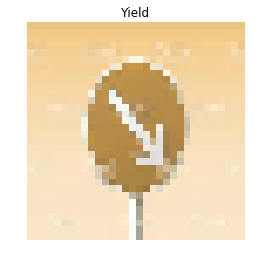

In [32]:
check('data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMQEhUSEBIRFRUXFRUXFRUXFRUWFRYWGBcYFxUWFxUYHSggGBolHhMVITEhJSkrLi4uFx8zOTMtNygtLisBCgoKDg0OGhAQGismHR4tLy0tLy0tLystLS8tLS0tLS0tLS0tLS0tLS0tKy0tLS0uLS0tKy0tLS0tLS0tLS8tLf/AABEIAMIBAwMBIgACEQEDEQH/xAAbAAEAAgMBAQAAAAAAAAAAAAAAAQIDBAYHBf/EAEMQAAEDAQYDBQYCBggHAAAAAAEAAhEDBBIhMUFRBWGRBiJScYETMnKhscHR8BQjM0KC8SRTYnOSorLhNHSTo8LD0//EABkBAQEBAQEBAAAAAAAAAAAAAAABAgMEBf/EACsRAAICAQMDAgYCAwAAAAAAAAABAhEDEiExMkFhBHEUIlGBsdEzoRNikf/aAAwDAQACEQMRAD8A7O+7xHqUvu8R6lTCQvsnwSL7vEepS+7xHqVMJCAi+7xHqUvu8R6lTCQgIvu8R6lL7vEepUwkICL7vEepS+7xHqVMJCAi+7xHqUvu8R6lTCQgIvu8R6lL7vEepUwkICL7vEepS+7xHqVMJCAi+7xHqUvu8R6lTCQgIvu8R6lL7vEepUwkICL7vEepS+7xHqVMJCAi+7xHqUvu8R6lTCQgIvu8R6lL7vEepUwkICL7vEepS+7xHqVMJCAi+7xHqUvu8R6lTCQgIvu8R6lL7vEepUwkICL7vEepUpCIDKaZBiDKsKJxmRAJWYVAIEk4HHadlDHBus4HMGM1z1M7aUa5aRmCohZqsEyDnvoqQtJmGikJCvCQrZKKQkK8JCWKLU6MxicZ02+qCjJhs85GSs0iACSMTl8lf2gluMxMnJYtnRJGuKTsoKCmTgAZWYRF29rMwccMoVnVAZEkZY7xurqZNKMHssJxmYj0VC2FtMqATiTjnrERPmsDm7GUTYaXYpCQrwohasxRWEhWUwliikLMKIzkwADljj9lSFmLhI7xBAAy6rLbNxS7mIUSZLZI8s1UUjsVnLwS7GJAx57wjXDumSI0jNTUy6UYG0ycgSpNLKJMiVmLgYxLYnAczop9oCA3lnz57hNTGlGrCQrwkLdmKKQkK8JCWSikKWtkjNWhSzAg8x9UsqRY0QBJJzIy23VTRMTB/OqzMcASbxzMiM8VS8I2gkgb8li2bpGMUXbFFlfBM3yJ0gorqZNKIvJeRFNi2QSoVkVIVRWRLFFUVkSxQDkDkRTYovJeRb1j4feF+objAJJOGG8nIc1mUoxVs1GMpOkalJjnmGtk/not4cLDBfr1GsbriAB/EcAvj8V7YNpg07E0c6jhh/C3XzPQrkbZbKlZ16q9zzu4zHkMgOQWVHJPwv7NSnjh/s/6O5rccsFLK9VP9lpI6uhvRar+2tEe5ZT6lrfoCuJlWq1S8y4yfKFv4ePe39zHxM+yS+x2Q7csPvWX/OD/AOAWen2qsT8KlF7Od0EdWGfkuEVqtVzjLjOEDCMAp8PDta+4+Jn3p/Y9Js9Gz2j/AIes0nwzJ9WmHBYbVYn0/ebhuMR/svOgYxGYyXQ8I7XV6MNqH2rNnHvjyfr6z6LLx5I8O/f9mlkxy6lXt+j7d5Ly3rOaNrZ7SzOAP7zDgQdnN08xgVpvYWmCII0VhNS9xODj7FQ5C5EW9jFshQrIrZKKorIliiqkKUQC8l5EU2LbIKKUVBeEhXhIWS0UhIV4SEFFISFeEhBRSEhXhIQUUhIV4WxYLL7R0HIYn8FJSUVbNRi5OkXslna1prViG02iccvP/bVcb2k7RPtbrrZbRB7rNXRk5+55ZD5rY7Zcc9u/2NM/qqZjDJ7hgT5DIep2XOJix388ue3gmbIl8kOO/kIuj7O9lXWlpqVCabCDcwxcdHQf3R8/mvi8TsFSz1DTqiCMjo4aOadQuiyxcnFPdHF4pKKk1szWRQolbMEooRChFCIDPYrY+i8VKTi1w13GoI1HJehcK4lTt9PRtZo7zfuN2n5H5+bLPYbY+hUbUpmHNPoRqDuCuWXHq3XKOuLLo2fDO6aZxCmFYV2VmNtFP3X4Pb4KmWPmcOh1UwucJakdZw0spCQrwkLZiikJCvCQgopCQrwkIKKQkK8JCCikIrwiCiYSFZFmzdFYVhSOyALOW4kQYnTRRsqia0JC2D7pEAwfyULBlGEe8moug14QthZ3twwbhGatWbnHrywTUTQayntDbf0SyQ0xUq90biR3j6DDzIWayU7z2jn9MVy3bu2+0tNwZUmho+I95x+bR/Csta5qPbllvRBy78I51ZKFQNc1zmh4BBLTMOAORhYkXrPGevcI4lTtNMPpHDIt1YfCRosfG+E07XTuPwIxY8ZtP3G416FeZcH4rUstQVKZ5Oafde3Y/Y6L0/hXE6dppipTOGRB95roxa4br5eXDLFLVHg+rhzRzR0y5PMrfwatQc5r2e7+8CII8Q1IWgQV6xxjhbLUy68YjFj4xafuDqNehXD8TsLmPp0qrGgZFwBjPANdoD1xXrxeo1rfk8uX02l7cHPK1NhcQ1oknIL6n6M137SmKUPa0RIvAnEY5+amiwiq39SGAPIDsccDA5+a7azisR8gqFu8RphobcaLp/fzJOoO0bLQWk7RiUadEykqEVMnRdjbeG1DQf7lYR5PjAjaRh53V0rQRIOYMH019RB9V50x5aQ5pgggg7EGQV6QawqXKoyq0w6NiIn1hwH8K82RaZp/U9WN6oNfQBqOpkZhZKYwO/djqrOGpEGdcimo1p2MEJC2XtknDy5/iouDbGDh9E1DQa4akLYYM5EYfdY6gxyhNRHExwkKyK2SisKFdEsUTCQrIoUqrIihSEUogIRSiA2+FM75PL6leY8Rr+0q1H+Ko93oXEheocOwvHkPuvJWHAeSuHrk/Yzn2hFe5ZFCL0nlJW/wTib7NUvsOEEOaSbrxBgHbHI6dV86UUaTVMsW4u0et8N4ky0MFSmZGo1adiNCsXGeGttVMsfhq1wzad+Y5fzXm3COKPs1S/TPJzT7rxsfsdF6VwziTLTTFSmcMiDm06tI3XzcuJ4na4PqYc0csdMuTzniVhdReadcuBBMSSQW6OBjIxH8lgEGCarsOZw8gfoF6TxnhbLUy4/AjFrhm07jcbjXoV5rxKwvs7zTqCCMjo4aOB1C9WHKsirueTNieN32MdQgCGuJBzHPy1WFF0nDuAC02QPZAqhz42eJ907HY9eXaUlBbnGMHN0jm0U1GFpLXAggwQcCDsQqLRgmV3PZyreslP8AsVHN9DMD/uN6LhF2XZE/0V//ADDP/UuOfpXud/T9TXhn3lKQiwdCEUogCgqUQFYSFZFSFYRWUoCYSFMJChqiISFMJCCiISFMJCCiISFMJCCja4ccSPL8/NeT1GXCWnNpIPoY+y9Ushh3mCPv9l572os3s7VVEYOdfHk/vH5lw9EwusjX1M51eNP6M+XKhEXqPIERQgJW7wnib7NUv0zyc0+64bH7HRaMqJUaTVM0m07R6vwziLLQwVKZwyIObTq0jdYuMcMZaWXH4EYtcM2ncbjca9CvOeFcTfZn36Z5OacnDY/Y6L0fhnEWWhgqUzhkQc2nVpG6+dlxPE7XB9LFlWVaZcnm3EbC+g806ggjI6OGjmnULt+xR/oo+N/1W9xfhjLSy4/AjFrhm07jcbjXoRg7N2N9Cj7OoBIe7LIjQjkVvJmU8fkzjwvHk24Pj9vbM2KdQNAeXXSdxEid4hccu17fH9VT/vD/AKSuIXf0/wDGjzep/kZMrteybIsvx15H8N3/AOZXEr0bhFn9nRoU9Qwvdyc7T/O7omd7JeR6dbt+DfhIUwkLB0oiEhTCQqKIhIUwkIKIhIUwkIKIhFMIgositcUhmeuGizZqmURSWwkJZCEUwkKghFMJCAAxivgdvbFeYyu0e73XfC4y0+jiR/Euha0YSpqsa9hp1B3XC6fJ2GemmKw5aWpLsbUdUXF9zyhRK+lbuCPovcx7mADJ7jDXA+7GGcdMVrjh75IcWtDYlzjDccoOq9inF9zwvHJdjUlFvssBLCAAXipdvAy27dnPKFoVGwSJB5jL0RSTDi0Qstms76rrtNpc6JgYmBngsMq1OoWkOaSCDIIwIO4Vfgi8m8eC2n+oq/4StvhVC2WZ99lCrs5t10OGx+x0XTdnOPi0i4+BVAxGQePE37j8j7a8U88l8ske7H6eLqUZMx2avfaHXXNke64EOB2IWSVCsBy0GErynsOW7en9VT/vD/pK4pd92xsofSEkNuukSYGUYmMlxjOHOIHepiZugugu5t5L3YJJQPnepg3kMnAbD7euxkd2bz/hbn1wHqvRKJvEv3MD4Rl1JcfVfH7N8INGl3u7Uq4ukwWsGnnj1I2X3xTgCMBHosSlqnfZG4QcYV3ZVFMJC0CEUwkICEUwgCWCEWS6NpxOE5KLmEypZaKIr3OY6olimTe5YfioDoy2SEWaLZBMqFaEVIVRWRUFUVkQAO5IXDbDbec0RSinzuKWBtoZ7J4Mt71NxJEwIIJjr13XGWms8OdTrUXASAGiQWlowgx3sF6C+mHCD/I6EHQr5vFeHtrNu1Ddd+5WAHoHjLPTLaDgpF6OePwWS18c/k4ynaywEMpEAumDJBbdulpkYzmtCvF43QQNATMcpW/xSx17MYqCBo4CWuO878jBXzCZXqjXKPHNvhhFCLRzLNcQZBIIyIwPVZP0up/WVP8AG78VhUIUz/pdT+sqf43fit9/EHGL7asXGCRUeMhnIwxlfJWam57+40FxMAADExGgzyHRZcUbjJo+hUt73ucHtc5rmht0PJuxljjjhqvt8B4cHBlavTMswpNnF92S0lvLTeJyznhHBHNh1oN5xxbREEebjkfpuTkulo0oN50F3LIDYfjr8l5pSvaJ6oxreX/C9IYS4S45x8h5CVe/p+fNRCmFKNNlUVkWjJVFZEBVSFKKABwzjml78URSi2C4bfNERWhYRSiAhFKICEUogIRSiAhFKICFBE5qyIDWqWfAtEOacCx+LSNgcYHIyPJc9xDs1Rdi0uoO2Pep/X6O9F1SKJVvF0V09pKzz20dlrQ3FoZUH9lwGHk6PktKvwuvMmz1G8mtc4dQF6SbKzRsfCS3/TCw1qJbJDngRyI6kFV5px5owsEJcWebjhtc5UK3/Tf+C3GcAtNQ4UbgyxcB6wcfkvr8b4xWotJY8YA5tb9guoo2dpaC68ZAJlzoy2mEWaT4of4ILmzkbL2UAP6+rj4KYl3Uif8AKujsHDW0hFJgpg5uPeqH1M/MnyX0mMDRDQANgAPorKO5dTNxSj0ox0qQblrmcyfMq6lFSEIpRAQilEBCKUQEIpRAQilEBCKUQBFKKAhFKtd5hLKURWhQhCEUqSIQFUUogIRSiAhFKkBAVX0LH+zPqtK6t2yfsz6rll6Tri6jhu2lBpY7ATDsRgcl0tD3W/CPoue7Y+474XfRdJZhLW/CPorjJPklFKLocyEUogIRSiAhFYBS4RqEspRFYqEIQisAoQEIpRAQilEAREVAWScTiIlY0UaKi97Awf5KSeYiMljRSi2XccMCIjJS8jT+axolAIiLRkIiIArMOKqigLjLEjL1W7ZT3Oq+et6yDuH1XLKvlO2LqOX7TPaGn2hBEzvA1J5cl9ykcG4jT6Lmu1pAY6ROB+h5roKHut+EfRMaJPkyuO3RVRF1SObCIipAiIgLNyPp9VJPMTyVEWaKZC7HPy/OiTzExn9FjRKLZkB3xw+6q/zVUSiMIiLRAiIgCIiAIiIAiIgCIiAIiIAiIgCIiALfsn7M+qlFyzdJ1xdRxPbH3HfC76Lo6Hut+EfRETGTJyXREXU5hERAEREAREQBERAEREAREQBERAf/2Q==')

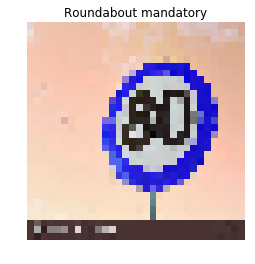

In [33]:
check('data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxASDxUSEhIVFRAVFRUVFRYVFRUVFRcVFRUXFhUVFRUYHSggGBolGxUVITEhJSorLi4uGB8zODMsNygtLisBCgoKDg0OFxAQGi0lHR0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tKy0vLS0tLS0tLS0tLS0uLf/AABEIAMEBBgMBEQACEQEDEQH/xAAcAAACAgMBAQAAAAAAAAAAAAAAAQIGBAUHAwj/xABEEAABBAADBAYGBwYGAQUAAAABAAIDEQQSIQUGMUETIlFhcYEHFlSRk6EUMkJScrHBI2KCktHwM0NTssLhohUkNGNz/8QAGwEBAQADAQEBAAAAAAAAAAAAAAECAwQFBgf/xAA2EQACAQIEAwUHBAICAwAAAAAAAQIDEQQSITEFQVETcYGRoQYiYbHB0eEUMkLwUmKi8TNDcv/aAAwDAQACEQMRAD8A6bJA0iwV0RnJOzNbirGvcutGoiSqYsSEEgBAJACARVIJQoKkPfDygaFYTi3sZxl1PeTu581rRmxxAHRSWhUe2g4rDcy2PKUClkr3MWa6Rq3pmiSIAK3MT3Y/lSwaNikBscBopoyttbHk9VIxbIOPYsrGLYRGipJXLBmybRboud3TOpO5ilmY8Vnexja4HDAHimZtDKkegkHBY2Mrj6IHW1jdotjwniI4LOLMZIx+j96zvYwsIYYo6gyEHsKJojRjSLdFGtlrnfYpckI21N8ncwHCl0rU1MgVUrEYlSCVAJYCSwBAChBJYCVAIYmdhsQMvWHBc84a6G+EtNTzdIOIWWVkbQ2y2mWxVK5jyOWcUa5M87KrRhc9YWdqwkzZBdSZiCxuZWQnAqh3PGRZJGEmeBCzNYNNKNXKnY948QtcoG6MyL5OaKIciDJddVk4dCKeos/f8kylzEo5teOixcTJSMiVunHRa0bGNgA1UdwhumCmUuYx5yCFlFNGErMwXx0t6lc0tWN2ZNbTJoW5BxVSIyBWRBIAQCQgIAQokICAVIQAEFiYWJkFICJVMRFCCpAe8XBa5G2OwOKJBs83yFZKJg5M8nKmFyBCoIlAIBColdlS1jO9wLR5qal0IWqRMjWqci8z0MhWOVGWZi+lEaJ2aHaHi+YlZKCRg5tkC4q2RLsYco0VM25WYEgEUICASASAagBUCQAgABQHvDFa1yZnFCljA8FYu4aIhoVJY86VRiyTYyUcrBRuSyUsb3LaxEalGAlZXO0jqSSseRCyMCBeO0e8IAIQgiFSipQEaVBEhCkUAihbizFLFuRQxFSARCFEgN0qZCQgqVAigBAILFoqAKkBACAEAID0DqUsW4EEqaIurDIsVoGibYrPDRHKxUrmS0NatWrM9EecpB4LJJkbRg4vHQQjNLI1nZmOp8BxPksataMF7zsbsPhK1d2pRb/vXYrWO32gB/ZsfIe09Rvzs/Jcc+JQWkFf0PZo+zNeetWaj3av6L1NRLvtiCerHG0UfvON1obutDrwXNLiVV7JI9OHszhUvelJvwX98zDk3jxJiJsgl31xG3Ldg1mPOr04rH9bVavf0MlwPCqeXL4OTvbrueTd6caP82/Fkf6NWtY6uv5ei+x0y4FgH/67eMvuZUG+eKH1mxuH4XNPvBr5LbHiVZb2ZzVPZrByXuuS8b/NfU2mE31iOksbmd7SHt/Q/IrqhxOL/fG3dqeXiPZerHWjNS+D0f1XyN/gsfDMLie1w50dR4tOo813061OqvcdzwMTg6+GdqsGvl4PYyCFtOYgQhRIyoiQgI0gFSCwIBIDckIZCpUCQCVIKkAUgEqASwBLAkAoAUAICbH0o43KmSa4LFotz3ZIFrcWZpmJtfaMEDc8rwByHEk9jW8Stc60aSvJnThsHWxU8tKN/ku9lD2vvjNJYhHRM7dDIfPg3ys968utxCpPSGi9T6zBeztClaVf35dP4/d+PkViV5cS5xJceJJsnxJ1XA3fVnvxiopRirJckSwjXl4yMzuBByhhk4drQDYVW+hjWyqDzyyp8728mbKLdfHvN9A7Ukku6OMa6/VJFDupbOynJ3scC4lg6MVF1b272/NIyzuXjy0NOTKCSG9LoCRRNAVdc1l2NS1uRzS4vgHPPrm2vl1sY0+6GOb/AJOb8L2H5EgrF0JrkdEOMYOX87d6ZqMZg5YjUsb2H95pHuJ0PktbTW6O+lWp1VenJPuaPAhQ2hHI5rg5pLXDgQaI8CFU2ndGM4RnFxkrp8n+S07G3wc2mYjrN/1AOsPxNHHxGvivTw/EZR0qarrz/J8vxD2chK88No/8Xs+58vl3Fyika9oc0hzSLBBsEdy9iMlJXi9D4+dOVOThNWa5MZCpiRIQESEKKkAqQgUgN0QoZkaVILL/AHy96XsWwnNRO6DQqVICoEQiIKlkApANLAFiBgIBqEJ0oU0W8W8jcP1GU6fs+yy+Bf3935Lz8XjY0vdjrL5Hu8K4NUxdqlTSn15vu+5z7G4qSV5fI4ueeJP5Ach3BeHOcpvNJ3Z9zQoU6MFCmrJf3zPbZeyZ8S7LEy64uOjG/id+g17lYQlJ2RrxWMo4aOaq7dFzfcv6i67L3HgZRmJlf2atjHkNT5nyXXDDpfu1PmMVx6tU0orKvN/jw8yzYfDsjblY1rW9jQGj3Bb0ktEeJOpOpLNNtv46nrSpiIhAL++SAhIwOFEWDxBFj3IypuLutyr7Z3Kw8oJi/Yydw/ZnxZenlXgVzzw8Xtoe1hOOV6TSq+/H18+fiULaGyJ4ZOjkZTuRsZXDta7h+q5HCSdmfU0MZRrQzwlp6rvRiYqAsIBvVodqKIvQgjuII8kasbITU02jY7v7dfhn1q6EnrM7P3mdh/P5jpw2JlRl8HujzeKcLp42HSa2f0fw+R0iGVr2h7SC1wBBHMFfQwkppSjsz8+qUpUpuE1ZrdDIWRgRIQCQBSgFSA3KxMgr+/1UzFsJ39/qD28OP9iJXDIkf0/P+q2JEFSpApAKkAqVIFJcBSl9S8gpZXIMKAkEIV/erb/QN6OMjpnDjocgPOvvHkPPx83HYzslkh+5+n5PoOC8I/VS7Wr/AONf8n07uvl3c/cSSSTZOpJ1JJ4knmV4LPvUklZf30LFuxuu7EVJLbYOXJ0nh2N7/d2rfRo5tXseNxPi6w16dPWfou/4/Dz6FzxW1MDg2iN8sUIA0ZmAdXcwanxXfGNlZHxlWrKpJzm7t82ah/pG2WCR0zjRqxDLXvyrLKzXdG82PtzC4oE4eZklcQCQ4fiYQHDzCjVimwpQpibT2hDh4nTTPDI28XH5AAaknkBqVQcu276V5nOLcJE1jOT5bc8jtDAQG+ZKyUSFafv5tUm/pbh3COED3ZFbIFn3b9IOMEjWYsRyRua1weAGSU7mAwZXVRvRtZTZCxcQdFkEGLg5PjcND31RB9/z71hKKaszfQrTozU4PU5Zt/CSQyCGS7ZeV1k5mONtq+AHCu215804uzPucFWhXp9rDnuujW5qysDrLVuPtYtf9Heeo+yzufxLfA/mO9elw/EZZdm9nt3/AJPmvaHh6qU/1EF70d/iuvh8u4vBC9s+MFSAiQgABYsoqVIbdYMyJE9n9/3p5rFR6lbIUsyAqLCpUAgFSpApAFIApAFIQdIDA25tJuHhMh1dwY37zjw8uJPcFz4rEKjTcufI7+G4GWMrqmtt2+i/OyOYzyue4vcSXONknmSvmZScm292fpdKnGnFQgrJaJG73R2D9JkzvH7Bh6377uIYO7mf+1to0s7u9keXxfiP6Wnlh++W3wXX7fgPSHvs+N5weEdkLOrLI2gQf9OM/ZrmRw4CqK9OMT4WUm2c4wWBnxEhbFG+WQ6nKC46/aceXiVnsYIyNq7uY3DMzz4d8bCazHK5tngCWkgeaiaZlYwcBjZYJWyxOLJWG2uH5HtB5jmqD6J2BtNuJwkWIADRIwOIvRrho8X3OBHktT0MziO/u87sdiTlcfo0ZIhbyPIyntLuXYKHbeaViHnuZunLtCVwDskLK6SSrq+DGDm4gHw4nkCbsC+4j0UYQM/Zyy9INR0hYWOPY4NaCB4FYZmU5/tx/wBGe6HK0SsLmuaA0sH2XOqqAe3Us4fVPG7zIbb0X7wyR47oZHEx4m+PASgW1w7LALa/D2KSRUX/AH82YJcMZAP2kNu8WfbHu18ly14XjfoexwXFOlXyP9s9PHl9vE5kVxH2Q2PLSHNNOBBB7CDYPvVTa1RjJKSals9zrez8UJYWSjg9od4EjUeRsL6ijU7SnGfU/MMXQdCtOk/4u329D2IWw0CKAVIUKQG3pYFEgBAKkKCAVK3IFKkFSAdIApAOkAUqDnW9+0elxBaD1IrY3vd9s+8V/Cvm8dX7Wq0to6L6n6FwLBfp8MpP909X3cl5a+JpYIHPe1jRbnENb4k0FyJXdkexUnGnBzlsldnVDG3BYF+QaQwvfy6zmtLi495K9SEFFKJ+c4rEyxFWVWW79Oi8D54e8kkuNuJJJPEkmyT3krpOI7l6M8PA3ZkToqLn26UjiZbpwd4aADspapbmyOw/SRtSGHZ8zJCOkmYY42faLjpmA7G8b7hzpIrUM4MVsIdi2gJNn7tCM22YxhhF0WuxMhLx4tEj/wCVa92ZcjjRCzId89HWzRBsyAV1pG9M/QWTJ1hfg3KPJapblLIVCnGPTJgQzHRyj/Oi1/FEcpP8rmDyWcdiFGwmJMUrJRxje2QeLHB36LIH0q9rXtri1w+Th/QrXuZRk4tNcjicsRa4tPFpLT4tNfovLtY/R4yzxUuuvmQQp0PcObNg8v3JHt8jT/8AkV7vDZXpNdH+T4b2jp5cXm/yin5XX0LCQvRPAFShRIUKQG2payiQIKVKKkFhoQ8Z5C2qA1vjyoWo3YyWoQvJu6sEjThoqncjWp60qQKQg6S5QpAYm1sV0OHkk5taSPxHRvzIWnE1ezpSkdWBw/6jE06XJvXu3focrZC5xoAud7z4n++a+XSZ+nucIq7skWrcjAM+kZjq6NgdmrS39UdGe7rg3rY5arqw8Fmv0Pn+N4mXYZVopO1u7XX0sXqaIPYWOFtc0tcO0OFH8yuw+SPnfeTZH0TFPgzteGHRzSCaPAPA+q+uI/qt6d9TUzDwuNmivopZI749HI9l+OUi0B44iZ73Znuc9x4uc4ucfFx1QqLP6NvoP05n0q89joLroulvTP8AvXWXlffSxlexUXr0zSEbPjHJ2IZflHIf0WMdzJnHOguMvvhy7RYBr+YLMh9H7EA+iQVw6GKvDo20tLMjLJQHKPTa4Z8IOeWc+Vxf0+SziQ5g/gfBZg+lNlG8PDfHoo/9gWoHINpG55SOBlkP/mV5j3Z+i4dWpQX+q+SMdjCXADiSAOPNWKuWrPJG5fdwoy2KZpINSNII1BzRtP5UvZ4arRn3nxvtDUz1ab/1fzZaCvTPniJCAVIUdKA2y1FFSpRUgEgBUEHxg1d6cKJH5IBxxhvDmbNm/wA0ISQDQAgGgK7vzIBhmtJoPlaCavQAu4c9WhedxKVqaXVnv+zlNvFSmv4xfrZfUqc9RgEk6W3iM2mmU6USwkEOqtCOQXkPQ+sheo2kt9fh/Xs1vz6ln3BlLxO883MFXwoHXxN6nmujDO92eDx+Cg6Ufg/oY3pN3mfhYWwwnLPNfWHFkY0JHY4k0D4nkF2QVz5yTscj2Zs+TETshjFySOoXw7XOcewCyT3LY2YI6/sj0bYCJgErXTyV1nOc5rb55WNIoeNnvWtybM8qK76Q9xcPBhnYrDAsyFueMuLmlrnBuZuYkggkaXVWqpEaOZFZg63v5M7Ebv4fEO+ufo0rvF7cpPveta3MuRyTpXZcuY5TyvT3LMh3z0f7RE+zIHA25jBE7tDourr4gA+BC1SWpkiwEoDh3pV2mJtoljTbYGCLuz2XSf7g3+FZrYhUcPhnSyNib9aRzWDxeQ0fmstgfRuOnbBh3P8Asxxkj+EaD8lok8sWzdh6Tq1Y01/JpHGPHjz8V5qP0XQAa1BojUEcVU7GEoqSszo24kJ+iF5JLpJHGySTTaYOP4Svd4an2Tk+bPhvaCUf1ShH+MV66/UsJC9A8MRCAKQoKA2i0mQK3IJAJUBSAKQAqApACAaFBCFW9IDSYov/AND/ALD/ANryuKftj3n0/sw121T/AOV8ykSucfrEk1WpvTsXj3Ps4qK2Ld6OZtZo+5jh/wCQd/xXXhXuj5r2kp6Up96+TX1Kh6XCf/UhfDoI68M0n62vRhsfJy3NTuJtaPC7Qjll0jIcxzvuh4oO8AavutJK6JF2Z3VmMiczO2Rhjq8wc0trtzXS1GZzP0m75QyxHCYZwkBc0yyN+rTTmDGO+0cwBJGmlczWcUYtnOMHhHzSsijFySODGjvPb3Die4FZkPoLaWwmSbOdggab0IiaTyLGjo3V3Oa0+S031uZnzxiYHxvcx7S2RhLXNPEOBohbiG73R3tm2e92RokifWeNxLQSNA5rgDldWnA2PKsWrlLLtj0rSPjLcPB0TyK6R7w8t/C0Ciewn3FRRBzlziSSSSSSSTqSTqSTzNrIF/8ARTu26Sb6bIKijsRX9uT6pcO5oseJ7ljJ8gWf0ibUAY3DNOrqe/uaD1R5kX/D3rixE/4n0XAcK3J13stF38/T5lBXKfUA1pJoCyTQHaToAqRtLV7HYNl4PoYI4vuMAPea1PvtfU4en2dKMeiPzLG4j9RXnV/yfpy9DJIW05hEKAAxRsySEQgNpS0ARCoEiYClbgEIKlSghAQoUhAQqGAgNLvbEDA1x4MkaT4OBZ+bwvO4nG9JPoz2+A1MuJcf8ov0s/oUvF5S09o714SPtad0yG7m0Rh8Ux5NMNsf+F3PyIafIrdRnlkma+J4Z4nDSgt1qu9fdXRYfSRus/FxNlhF4iIEZf8AUYdS0H7wOo8SOa9WMrbn561c4zKwtcWuBa5ppzSCHA9hB1BW0wZBkAcdGgny/MqAyMDs6aeTooY3SSfdaLI/EeDR3mgl7blSOwbg7kDBftpiH4oihWrYgeIaebjzd5DmTqlK5mkXMlYlKZvtuLHjT0sbhFiqALiLZIBoA8Dga0zDzBoVknYhy7aO5m0YSQ7DPcB9qIdK094yWfeAs8yBi4XdnHyGmYSe/wB6N0Y976HzRtAue7noveXB+NcAwa9DGbc7ufINGjubfiFi5dAX7au0YcHh7ygNaA2ONtNsgdVrQOAHyC1VJqCuzrweEniaqhHxfRHKMZinyyOkebe82T+g7gKA8F57bbuz7ulThSgoQWiPBQzLHuPsrpsT0hH7OKneL/sDy4+Q7V3YCh2lVN7R1+x4nHcb2GH7OL96pp4c39DpJC+iPhBUgFSjKSWDsZq4iliXNitJBFAKkQBUBSXIFK3KFIQKQBSoFSltSklSGPj8KJYnxnTM0i+w8j5GitVan2lOUep0YWu6FaFVfxd/v6HPHbOc4WdHahw7HA04eRBXyzdtGfokcTGO2q5dz2NdjMEW96qZ1U62YuW5u3czRh5TUjRUbj9to4Nv7wHvHmu6hVusr3PluM8OySeIpL3Xuuj69z9GbvaWxsLiP8eCOQjgXNBcPB3ELqTaPn2jXwbm7OY7M3CsvvL3e4E0FczJZG5w2HZG3LGxrG9jAGj3BYlPW1bARKAjaAVoBFAarbu24cKy3m3kdVg+s7+g7ysKlRQWp2YPA1cVK0FpzfJf3ocx2ztaTEyZ5KFWGgXTQdaFrgnNzd2fZ4TCQwsMkP8As16xOk9cJhXyyNjjFvcaA/U9gWUYuTUY7s1Vq0KNN1Kjskda2NstuGgbE3WtXH7zjxK+lw1FUYKK8e8/Ocdi54qs6suey6LkjNIXRc5BEKgihQtYuNypglhc2RC5gFIBKgVIQEAIAVAK3AIAQAgGgKxvJhDG/pW/UeRm/dfwB8HaDx/EvD4jh8su0js9+8+p4Ni1Uh2Ev3R2+K/Hy7jRuyuGq8w91XjsajGxkO7uR7COxZo7ack4lh2LviWAMxNuHASAWf428/Ea93NdlPEcpHg47gam3PD6f6vbwf0fmXDCYyOVuaN7Xt7WkH39hXUpJ6o+bq0alKWWpFp/E9SVbGsRKpAQCQGJj9owwtzSyNYOVnU+A4nyWMpRjub6GGq13anFsp+2d+ibbhmkf/Y8fNrP1PuXNPE8on0GE4Db3sQ/BfV/bzKXPM97i97i554lxslczberPoYU4wiowVkuR5lQpKGJz3BrQXOcaAGpJWSTbsjCc404uUnZLdnTt093BhWZ30Z3DrHk0fdb+p5r3cHhOyWaX7n6HwnFeJvFzyx0gtvj8X9OhvyF3nkCIQESqCNJcBSty2FlS4sbNcgClQKkAkIKlQCAEAUgClQCAEA0BCaJrmlrwCwiiDwIPasZRUk09mZ05yhJSi7NbMou19lnDv45oXHqvu67Gv7D2Hn4r5/FYSVF3X7T7Xh/EY4uFtprddfivty7jV4rClw0cVypnqQqpPVGllaQaKzOtNPVEI5nsOZjnNd2tJafeFkm1sY1IRmrTSa+KubbDb3Y1mnSB4/fa0/MUfmtqrzR5tTg+Enrlt3P/tGbHv5iuccR8A8f8isv1MuiOZ8Aw72lL0+xCXfvF8mwt/hef+aPET+BlHgGGW7k/FfYwZd48dNY6YtbVnJTGtHaXNFgeaxdWcuZ0R4bg6OuRN/HV+T09DCxGF6j3F2aQFhNk56Oh4k5m2WkOB9ywaOmnU95JKyd+78P4GAsDq0EhNDL2XsubEPyRMs8z9lve4rZSpTqO0UcuKxlHCwzVXboub7kdN3c3aiwov68xGryOHc0cgvcw2EjR13fX7Hw/EeKVcZKz0gtl9+rN0Quw8wiQrcCIQCyqgRCAVIUMqA2C5iAgEhApUCpAIhGVAAqQEAIApACAdIDzxTCWEDiQgMduHBdTmdQtLSHBtGzwI1vRY5bq0tjYpuLUouzXM0W0t2XNt2HNt/03HUfgdzHcffyXlYjh3Ol5H0WD42naOIWv+S+q+q8ipbZwhHEZXji0ij40V5uWUXaSsfSYWvGavF3XVGjcsjsPNjqINA0QaOoNcj3LIweqaJYmcvkc8tjZmNhsbcjGiqprbNcPfas2m7pWNOGpypQyznma5vcyNnhzSJW2HMcHDqBwIb9bLejnDjXZfYrHTUmItOLp30krb6q/wAkZeKfkF3T3OL6oUXH610AHxEOI4aEGtCspvmc+HptpRbukrXe9uXc18jWOmPbpWUDjTc2bKCdatarnoKC8frtcng8FLM7LGxzz+6LHmeSyhTlN2irmqviqVBXqyS7/tuW/Y24TjTsS+h9xh183cvJehR4c3rUfgfOYz2j3jh14v6L7+Rd8Hgo4mBkbA1o5Afn2r1YQjBWirI+Yq1p1ZOdR3b5s9aWZrEgEVGBUqAIVAqS5QpLlFSXBn0ucwFStwJACAVIAQBSoBACAKQAhAVKFKAdKgSA8cXg4pW5ZGNe3scAVhOEZq0lc2Uq1SlLNTk0/gyu47cXCv1YXxnuOYe5y5J4Cm9ro9mj7QYuGkrS71r6WNLiPR3L9idh/E0j5i1ofD5cmjvh7Sx/nTfg/wAGh2pu/Lh3hsmZw0LjG3Npzqzxpc08O4Ss2dK4/RlG6i/T7ktgD6TJ9HiL2y0TcjaaAwjIbBvM0aADS3EniVsp4eU9E0c1TjNFSu4O3h4+ZYoPR2eMmI/kaPla3rh3+UjXP2lktKdPzd/lY3OD3MwcepYZD++bHuXRDBUY7q/eebW43jKmmey+Gnrv6m9hhYwUxoaOxoA/JdcUoqyR5cpSk7yd2TWRiJUCIQEUAqVKFIBIAQoUgFSFM9wXOjFhkKXQysiQhBUqApAFJcBStwFIBIAVICFCkICAaFBCCpCjQAgNBt9op5PGv0/6Xm4l+8zrpftRWdxIwcc49kTvm4BZYLmY4h7HRF6JzCQCIQCVAkuBUqBUgClQKkAqQCpDK4IBIU2djjzXLrsLrcYfoo0ZKR5udayiYyZGlkYBSXAqQBlS4sFKkCkBAqX1LyJUsrkCkKFIQKQAhQQEXI2EhgKgrm8z6jf5ry6795nZDZGj9HjbxMp7I/zcP6Ldg+ZrxHIv67jmEgBCkSqBAKJhhSoFSAVK3AUlwKkuUKS4IlGyodK3KYnrbs72yD4jVzkyvoP1u2d7ZB8RqhbS6CO9mzvbIPiNQmV9AG9uzvbIPiNQuVrkTO9+zfa4PiNUsZO75ETvbs2v/lwfEaqSztsR9bdne2QfEaqTKxHezZ3tkHxGq3I4voL1r2d7ZB8RqXJlfQPWvZ3tcHxGq3GV9BetezvbIPiNS4yS6D9a9ne2QfEalxkl0D1r2d7ZB8RqXQyy6B62bO9sg+I1LoZJdBetezva4PiNS4yS6Ad69ne1wfEarmGSXQPWvZ3tcHxAmZDLLoHrXs72uD4jUuhll0KzvJvBhHxuDMRG4nkHArzqkJN7HZFpIw9wts4WJ8plnjZbWAZnAXqSa+S34WLinc01ldqxcfWvZ/tcHxGrrujVll0D1r2f7XB8RqXRMsugvWrZ/tcPxGpdDLLoL1q2f7XD8QJdDJLoHrVs/wBrh/nal0XK+getWz/a4P52pmQyvoL1p2f7XD8RquZDK+gvWnZ/tcPxGqZkMr6B607P9rh/narmQyvoHrTs/wBrh+I1MyGWXQj607P9rh/namZDLLoHrRs/2uH+dqZkXK+getGz/a4fiBMyLlZwpaTcdY2buVswbOw2Jmje580THuJxLYW5nMzEDM4DuAHn2rU5O7RSs+kbYWDwrcJJhA8R4iJ8nXcXGh0ZYdeBqTVZxbd7gwG7sOZG+WQh0fQYh7HNErP2kUbXj/FY3M2nDVtg666JcHm7dOcNDy+MRFsjukcJmNAia17z14wXDK4EFoINEXaZkAO6k2bKyWCR9tGVjn3+0hfPD9ZgHXYw0ONloNWmYGHhdiSyTMhaW53xCausS1hjMwDmtaXF5YAcrQT1grcGSN3bhbKJ4qJxHSZhKGsZA9jM95LNukYKAvrt0+tllwJ27j2FplliaxzwI+s8mZuWN+aLKw6FsrKLsurq5GlwLaewHx40YYFofJMY42ucczWvm6OEykDq5hld20QaFhVPS4MnD7tDoJJHzxZcrDHKHSdFm6cRSscOjz2LHBtdYG6Uzag8vVWcPLHyRMkGclhc4v6OOUxSSim0WgteavMQ0kBMwDHbsvY+RrZonZTiOjbbxJKzDOcJXtaW0K6OTQkWY3VYAJtwaFUgIAQAgBACAEAIAQAgBACAEAIAQAgMnAYYSOLTIyOhdvIAPWaKBPOiT/CVAZn/AKTHQ/8AdQ876zdKv97UGhVA8ezVS5TCxkDWOpsgeKu28Lsgjiez5hUGOqQEB0zZXpBwDMNhI3x4xs2Gh6EvhGHyuaWsEjRnfdHo260HCtCFg4NtlK/vxvLhsW3CMw0czGYWN0Y6YR5iP2Yb9RzgaEet9qsVa9wYWK3txDw/qRN6QyueWteSXTtDZHdd51oCh9UVoK0TKgLG714iUPBZE3pDMXlrZLc6doZI63PNGgKA0FaBMqB5YLbjhKHSEtZ0mFkcYmgyA4OMshyZnACxxJvtrTKbYGNiNqukxL8Q+NjnPc52R2fI2/qhpY5rhlFAURVBLEMyXeid+bpGQvzumLw5rwHCcsc9hyvHVzRRuBHWBYOtxBWKQn3klfWeKB+U3FbXjoeoyMCLK8dUNij0dm1bfG0sCQ3hfJjMPicQA4xTxyOcxvXcxswlyamnZRbW3rVAkgCltAeWJ2/K6EwhkUcJA6jGvoESiUuBc8nMXBt2SKAAASwPbEb04h5c4ti6Vwkb0oa7pGslkdK+Ntuy5cz3DVpIDiLTKgLEbyyvLj0UIe7pg17WyZoxiC4ziMmQgBxfIdQSOkdloUAsDSKkBACAEAIAQAgBACAEAIAQAgBACAzsLicO1gD8Pndrbule29dNBoKGnu84UmzF4YXeGJ1J/wAV/DkL4/1/JqCJxOGsH6Oayix0j6zWbIN3VZfcU1BjYqRjnWyPI2uGZztbOtu17PcgPFUgIAQAgBACAEAIAQAgBACAEAIAQAgBACAEAIAQAgBACAEAIAQAgBACAEAIAQAgP//Z')